In [6]:
import numpy as np
import pandas as pd

In [10]:
radar = "../csv_data/tri_an_thanh_hoa/RADAR_CSV.csv"
era5 = "../csv_data/tri_an_thanh_hoa/ERA5_CSV.csv"
hima = "../csv_data/tri_an_thanh_hoa/HIMA_CSV.csv"


In [16]:
def check_csv(path):
    y_thanhhoa = pd.read_csv(path)
    print(y_thanhhoa.info())

    total = len(y_thanhhoa)
    print(f"Tổng số ô: {total}")

    num_zero = (y_thanhhoa["value"] == 0).sum()
    ratio = num_zero / total
    print(f"Số ô value = 0: {num_zero}")
    print(f"Tỉ lệ value = 0: {ratio:.6f} ({ratio*100:.2f}%)")

    num_9999 = (y_thanhhoa["value"] == -9999).sum()
    ratio = num_9999 / total
    print(f"Số ô value = -9999: {num_9999}")
    print(f"Tỉ lệ value = -9999 : {ratio:.6f} ({ratio*100:.2f}%)")

In [17]:
check_csv(radar)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482252 entries, 0 to 1482251
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   variable   1482252 non-null  int64  
 1   timestamp  1482252 non-null  object 
 2   row        1482252 non-null  int64  
 3   col        1482252 non-null  int64  
 4   value      1482252 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 56.5+ MB
None
Tổng số ô: 1482252
Số ô value = 0: 1329790
Tỉ lệ value = 0: 0.897142 (89.71%)
Số ô value = -9999: 0
Tỉ lệ value = -9999 : 0.000000 (0.00%)


In [18]:
check_csv(era5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83623680 entries, 0 to 83623679
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   variable    object 
 1   timestamp   object 
 2   row         int64  
 3   col         int64  
 4   value       float64
 5   in_ha_tinh  bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 3.2+ GB
None
Tổng số ô: 83623680
Số ô value = 0: 335166
Tỉ lệ value = 0: 0.004008 (0.40%)
Số ô value = -9999: 12
Tỉ lệ value = -9999 : 0.000000 (0.00%)


In [19]:
check_csv(hima)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47215392 entries, 0 to 47215391
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   variable    object 
 1   timestamp   object 
 2   row         int64  
 3   col         int64  
 4   value       float64
 5   in_ha_tinh  bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 1.8+ GB
None
Tổng số ô: 47215392
Số ô value = 0: 0
Tỉ lệ value = 0: 0.000000 (0.00%)
Số ô value = -9999: 0
Tỉ lệ value = -9999 : 0.000000 (0.00%)


In [31]:
path_X = "../csv_data/tri_an_thanh_hoa/x.npy"
path_Y = "../csv_data/tri_an_thanh_hoa/y.npy"
X = np.load(path_X)
Y = np.load(path_Y)
def check_numpy(path):
    X = np.load(path)

    total = X.size

    num_zero = np.sum(X == 0)
    num_neg9999 = np.sum(X == -9999)

    print("Shape:", X.shape)
    print(f"Số phần tử = 0: {num_zero}")
    print(f"Tỉ lệ = 0: {num_zero / total:.6f} ({num_zero / total * 100:.2f}%)")
    print(f"Số phần tử = -9999: {num_neg9999}")
    print(f"Tỉ lệ = -9999: {num_neg9999 / total:.6f} ({num_neg9999 / total * 100:.2f}%)")


In [32]:
check_numpy(path_X)

Shape: (1223, 12, 34, 42)
Số phần tử = 0: 266298
Tỉ lệ = 0: 0.012707 (1.27%)
Số phần tử = -9999: 0
Tỉ lệ = -9999: 0.000000 (0.00%)


In [40]:
check_numpy(path_Y)


Shape: (1223, 34, 42)
Số phần tử = 0: 648673
Tỉ lệ = 0: 0.371425 (37.14%)
Số phần tử = -9999: 0
Tỉ lệ = -9999: 0.000000 (0.00%)


In [34]:
def check_am1(X):
    total = X.size
    num_neg1 = np.sum(X == -1)

    print("Shape:", X.shape)
    print(f"Số phần tử = -1 : {num_neg1}")
    print(f"Tỉ lệ = -1: {num_neg1 / total:.6f} ({num_neg1 / total * 100:.2f}%)")


In [35]:
check_am1(X)

Shape: (1223, 12, 34, 42)
Số phần tử = -1 : 0
Tỉ lệ = -1: 0.000000 (0.00%)


In [36]:
check_am1(Y)

Shape: (1223, 34, 42)
Số phần tử = -1 : 1017536
Tỉ lệ = -1: 0.582633 (58.26%)


In [57]:
y_check = np.load("../csv_data/tri_an_thanh_hoa/y_direct.npy")
print(y_check.shape)
tong = y_check.size
print(tong)
num_zero = np.sum(y_check == 0)
print(num_zero)

print("ti le 0", num_zero/tong)

(1223, 36, 49)
2157372
959229
ti le 0 0.4446284646319689


In [58]:
for t in range(0, y_check.shape[0]):
    rain_pixels = np.sum(y_check[t] > 0)
    print(f"t={t}: số pixel mưa = {rain_pixels}")

t=0: số pixel mưa = 71
t=1: số pixel mưa = 55
t=2: số pixel mưa = 143
t=3: số pixel mưa = 129
t=4: số pixel mưa = 131
t=5: số pixel mưa = 145
t=6: số pixel mưa = 165
t=7: số pixel mưa = 202
t=8: số pixel mưa = 211
t=9: số pixel mưa = 180
t=10: số pixel mưa = 118
t=11: số pixel mưa = 132
t=12: số pixel mưa = 45
t=13: số pixel mưa = 29
t=14: số pixel mưa = 0
t=15: số pixel mưa = 0
t=16: số pixel mưa = 0
t=17: số pixel mưa = 0
t=18: số pixel mưa = 0
t=19: số pixel mưa = 0
t=20: số pixel mưa = 0
t=21: số pixel mưa = 0
t=22: số pixel mưa = 0
t=23: số pixel mưa = 0
t=24: số pixel mưa = 0
t=25: số pixel mưa = 0
t=26: số pixel mưa = 0
t=27: số pixel mưa = 0
t=28: số pixel mưa = 0
t=29: số pixel mưa = 0
t=30: số pixel mưa = 0
t=31: số pixel mưa = 0
t=32: số pixel mưa = 0
t=33: số pixel mưa = 0
t=34: số pixel mưa = 0
t=35: số pixel mưa = 0
t=36: số pixel mưa = 0
t=37: số pixel mưa = 57
t=38: số pixel mưa = 0
t=39: số pixel mưa = 0
t=40: số pixel mưa = 0
t=41: số pixel mưa = 0
t=42: số pixel mưa 

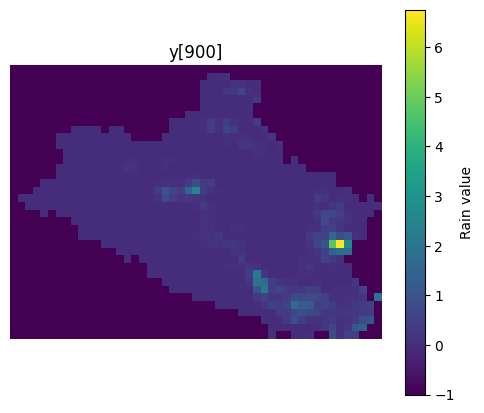

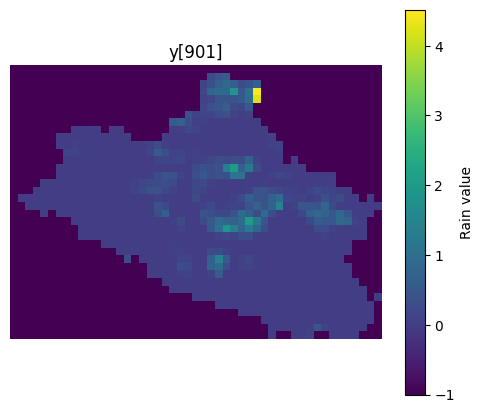

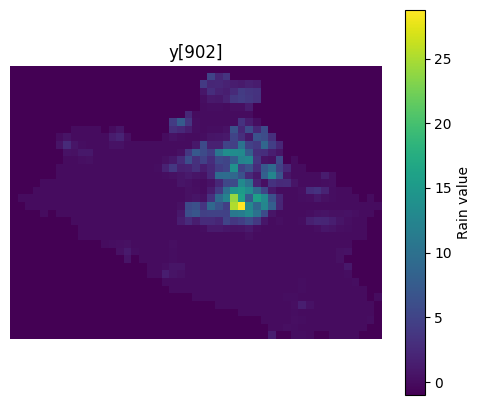

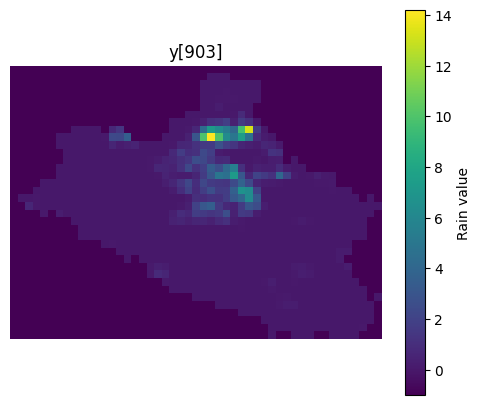

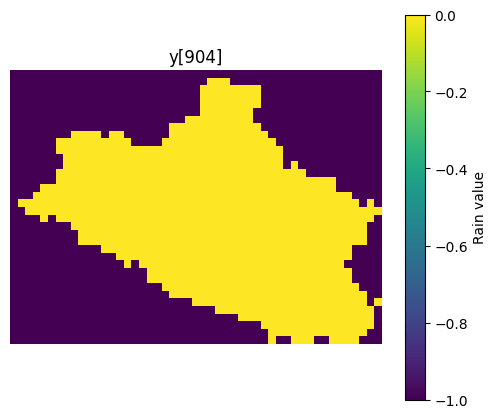

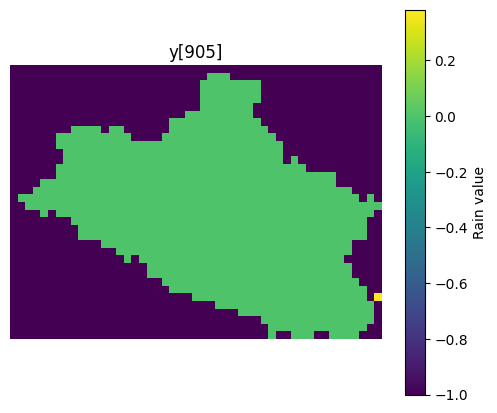

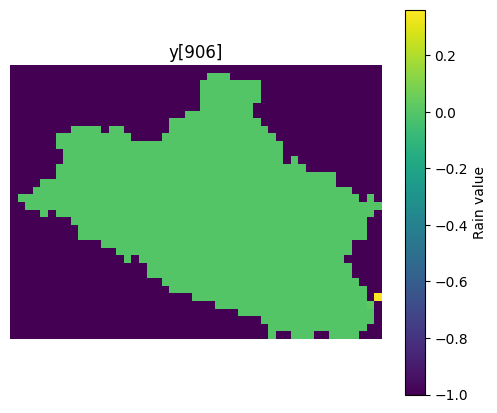

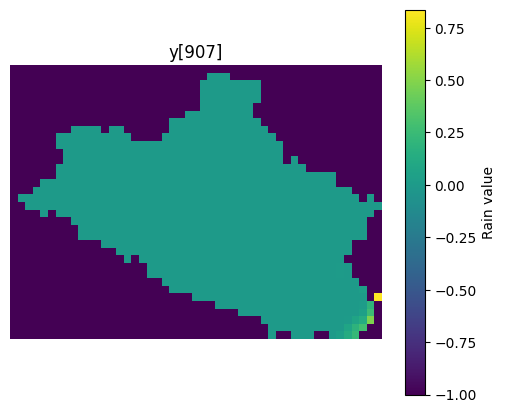

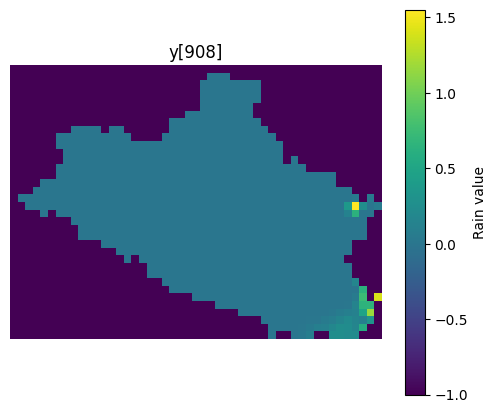

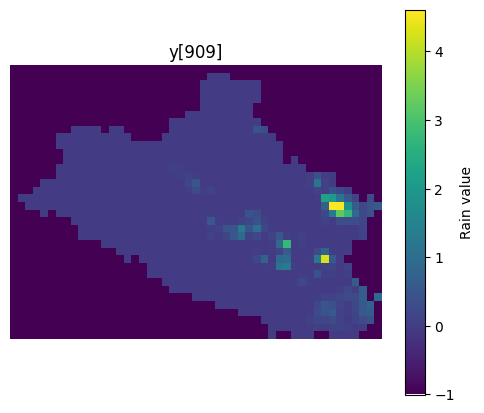

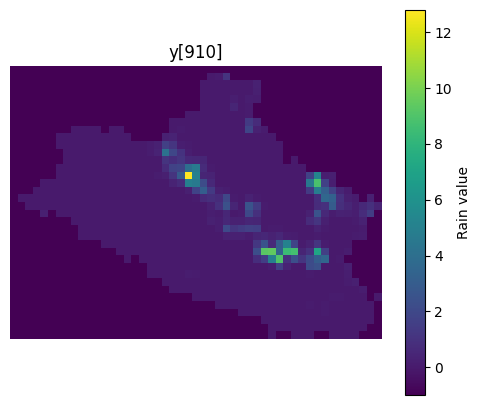

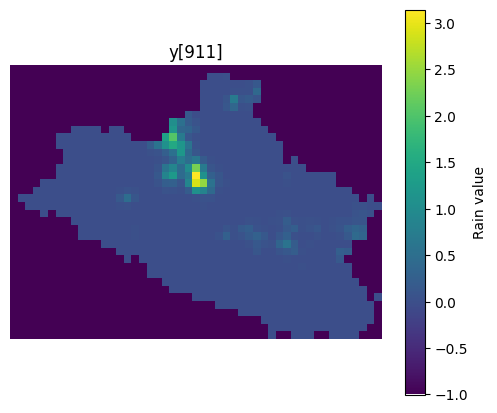

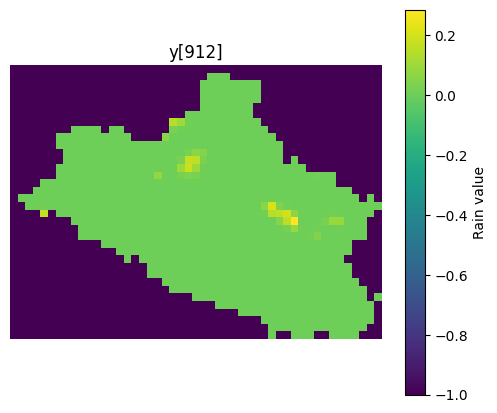

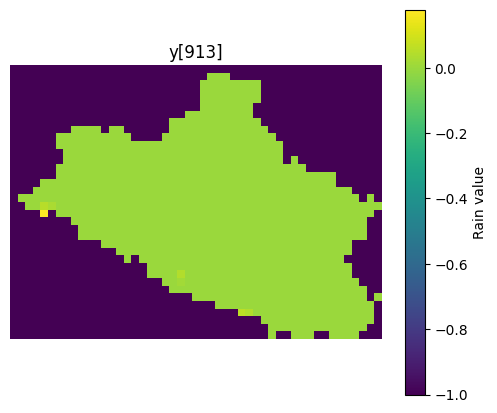

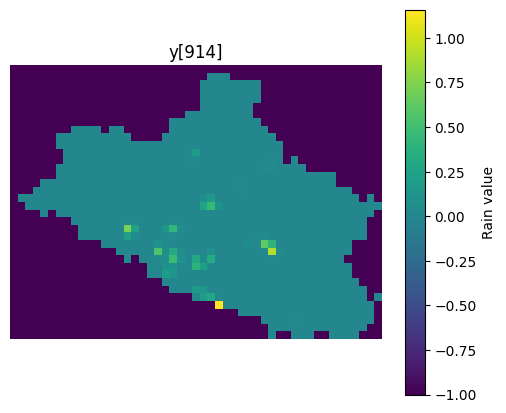

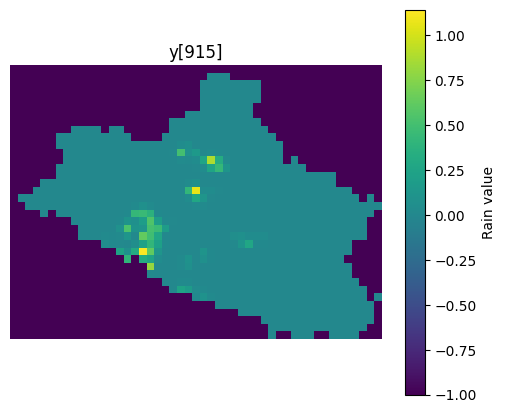

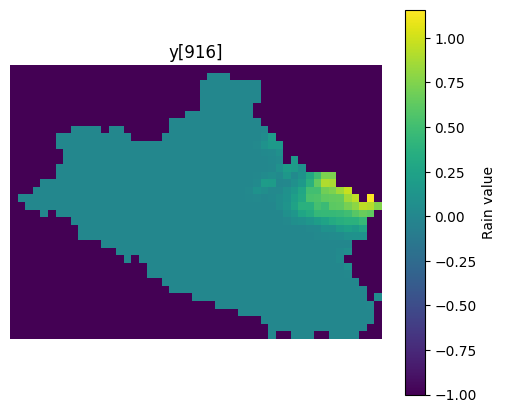

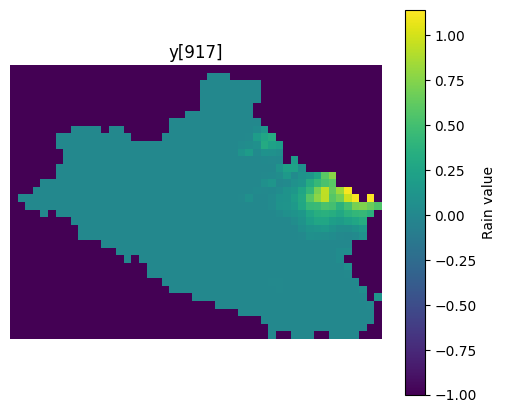

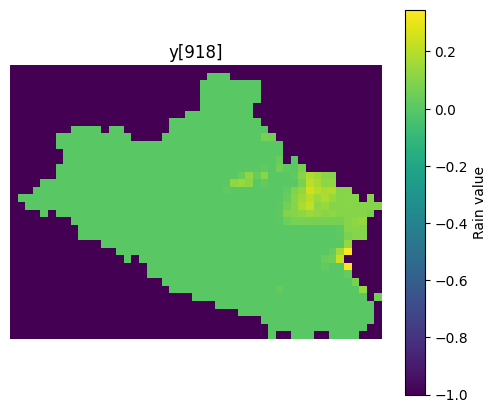

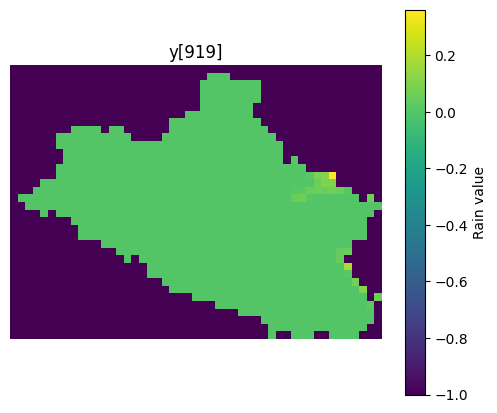

In [59]:
import numpy as np
import matplotlib.pyplot as plt

start = 900
n_show = 20

for t in range(start, start + n_show):
    map_t = y_check[t]   # shape (34, 42)

    map_t = map_t.astype(float)
    map_t[map_t == -9999] = np.nan

    plt.figure(figsize=(6, 5))
    plt.imshow(map_t, cmap="viridis")
    plt.colorbar(label="Rain value")
    plt.title(f"y[{t}]")
    plt.axis("off")
    plt.show()
